<a href="https://colab.research.google.com/github/Niki-KR/TMO/blob/master/notebooks/%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовая работа по курсу "Технологии машинного обучения"

***Студент:*** Кривцов Никита Александрович, *ИУ5-63Б*  
***Руководитель КР:*** Гапанюк Юрий Евгеньевич



## 1. Поиск и выбор набора данных для построения моделей машинного обучения

В работе будет использоваться набор данных о музыкальных композициях, размещённых на музыкальном стриминговом сервисе Spotify. Датасет был взят с веб-портала Kaggle. Дополнительную информацию о наборе данных можно найти по [ссылке](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).

Целью работы с такими данными является прогнозирование популярности той или иной композиции, что может быть выгодно как её авторам и исполнителям, так и лейбл-компаниям, её выпустившим.

Предложенный по ссылке выше датасет состоит из нескольких файлов:

- data.csv 
- data_by_artist.csv
- data_by_genres.csv
- data_by_year.csv
- data_w_genres.csv
- super_genres.json

В рамках настоящей работы будет использоваться только файл data.csv. Признаки, представленные в файле:

- acousticness - мера акустического звучания композиции
- artists - исполнители
- danceability - 
- duration_ms - продолжительность композиции в миллисекундах
- energy - 
- explicit - наличие нецензурной лексики в словах песни
- instrumentalness - 
- key
- liveness -
- loudness -
- mode -
- name - название композиции
- popularity - мера популярности композиции **(целевой признак)**
- release_date - дата релиза композиции
- speechiness
- tempo - темп композиции в bpm (beats per minute / удары в минуту)
- valence
- year - год релиза композиции

На решение выставляется задача **регрессии** по целевому признаку `popularity`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Загрузка данных

Данные из датасаета загружаются с применением библиотеки Pandas. Метод `pd.read_csv()` считывает данные из файла data.csv, представляющего собой набор табличных записей, где столбцы отделены друг от друга запятыми (comma-separated values), и сохраняет их в объект `df` класса `pd.Dataframe`.

In [0]:
# Признаки "Unnamed: 0" и "id" удаляются за ненадобностью
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv").drop(["Unnamed: 0", "id"], axis=1)

## 2. Разведочный анализ данных

### Основные характеристики датасета

In [3]:
# Список признаков
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [4]:
# Типы признаков
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

Целевой признак `popularity` обладает типом `int64`, что усложняет задачу регрессии по нему. Возникает необходимость преобразования его в `float64`.

Помимо численных, в наборе присутствуют три категориальных признака типа `object`.  
По существу, признак `key` тоже является категориальным, т.к. он определяет музыкальную тональность композиции. Тем не менее, этот признак был преобразован создателем датасета в целочисленный методом **Label Encoding**. Неявное задание отношения порядка на этом признаке не является неособованным - музыкальные тональности, в общем случае, упорядочены по возрастанию "высоты" звука, т.е. использование этого кодирования вполне уместно.

In [5]:
# Проверка на наличие пропусков
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

В данных отсутствуют пропуски!

In [6]:
# Первые 5 записей
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,0.996,['John McCormack'],0.518,159507,0.203,0,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


Для всех численных признаков построим диаграммы распределения и графики `violinplot`. (Примечание: метод `sns.pairplot()` библиотеки Seaborn не применяется ввиду слишком большого объёма данных, необходимых для отрисовки как графиков распределений, так и графиков попарных зависемостей признаков.)

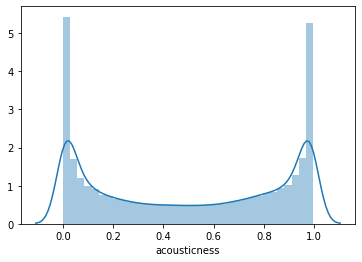

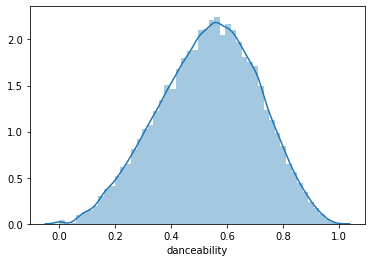

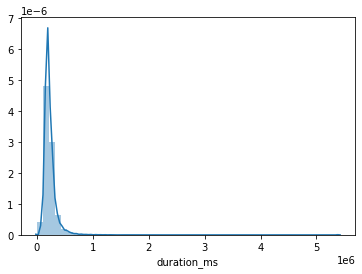

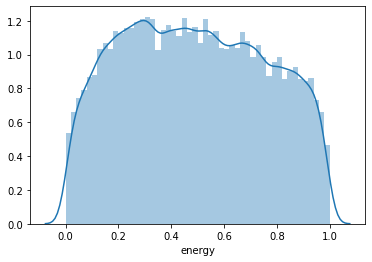

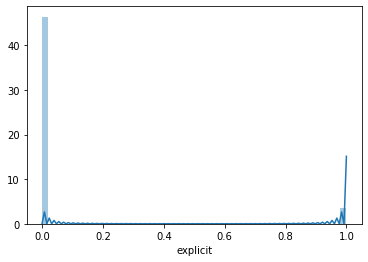

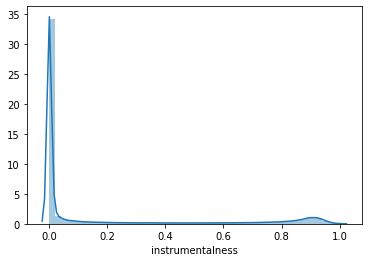

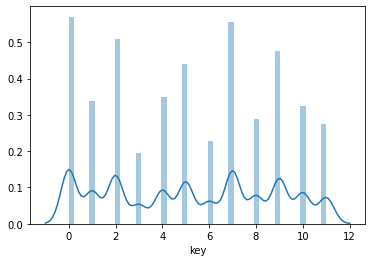

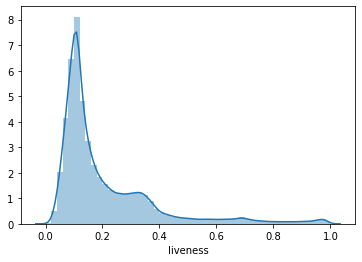

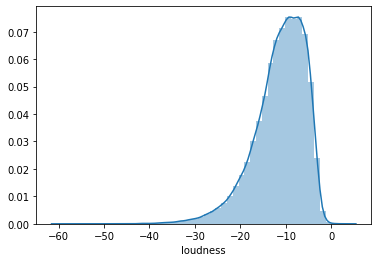

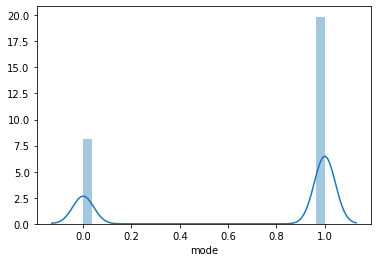

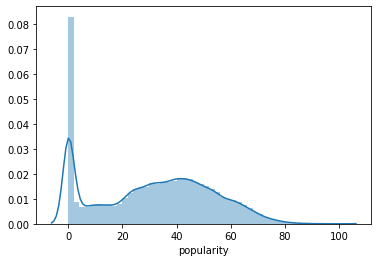

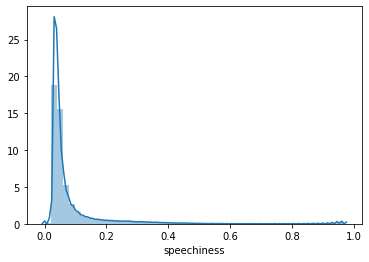

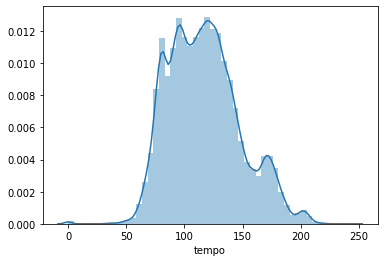

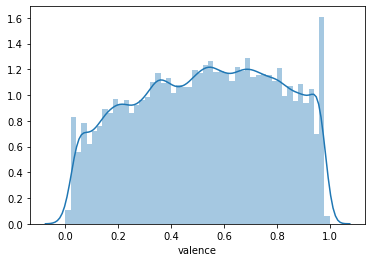

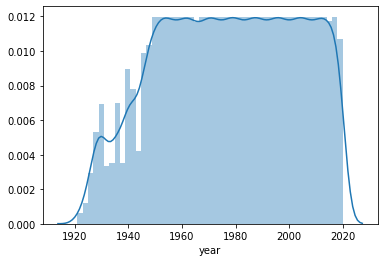

In [7]:
for numeric_column in df.select_dtypes(include=np.number):
  sns.distplot(df[numeric_column])
  plt.show()

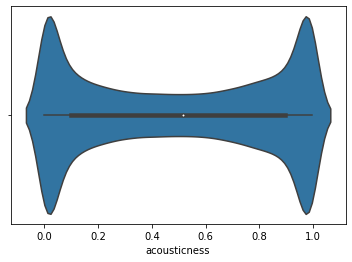

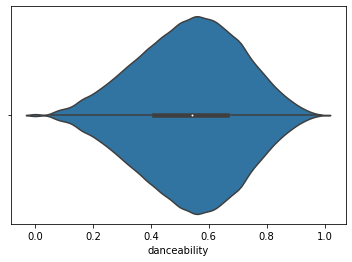

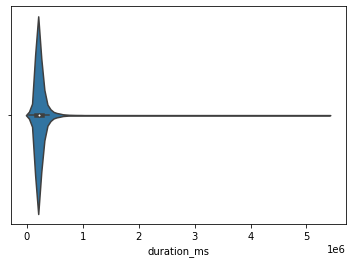

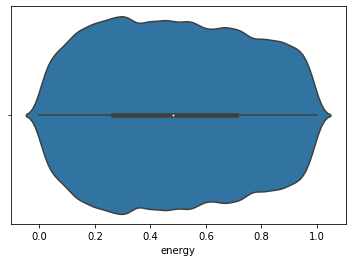

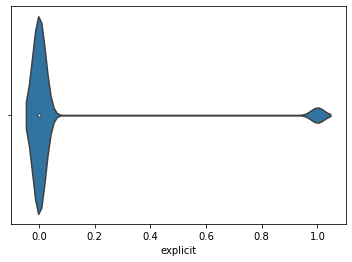

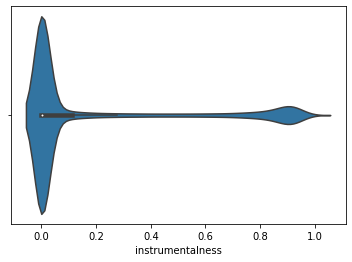

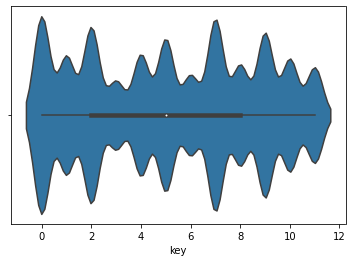

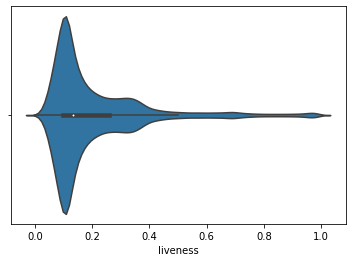

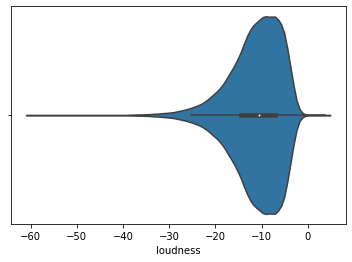

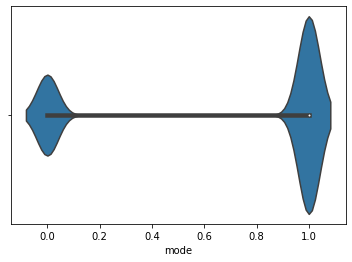

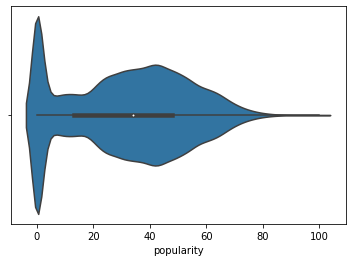

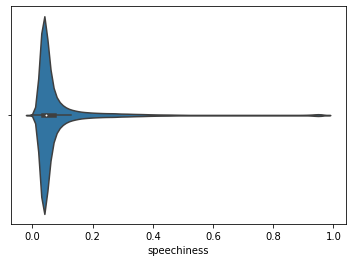

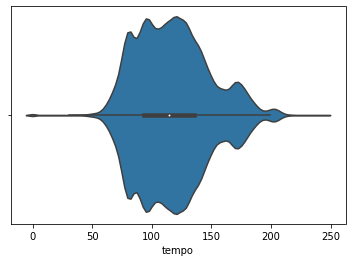

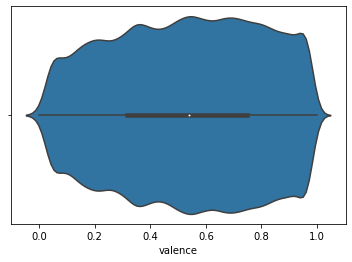

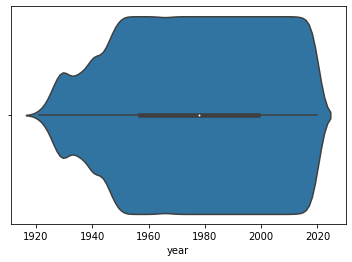

In [8]:
for numeric_column in df.select_dtypes(include=np.number):
  sns.violinplot(df[numeric_column])
  plt.show()

Значения признаков `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `speechiness` и `valence` лежат на отрезке $[0, 1]$. Будет целесообразным привести остальные непреревные численные признаки к этому виду.

Признаки `explicit` и `mode` принимают только значения из множества $\{0, 1\}$.

## 3. Выбор признаков для построения моделей машинного обучения. Масштабирование целочисленных признаков

### Выбор признаков

В первую очередь рассмотрим категориальные признаки. Определим количество уникальных значений каждого из них.

In [9]:
for f in df.select_dtypes(include="object"):
  print("Число уникальных значений {}: {}.".format(f, len(df[f].unique())))

Число уникальных значений artists: 33268.
Число уникальных значений name: 131361.
Число уникальных значений release_date: 10813.


Ни один из имеющихся категориальных признаков не пригоден для решения задачи:


1. Значения признака `artists` представляют собой ***списки*** артистов и авторов, участвовавших в создании и исполнении композиции. У этого признака более 30 тысяч уникальных значений! Для него ни в коем случае недопустимо применение кодирования по методу **OHE**, а кодирование методом **Label Enconding** приведёт к необоснованному упорядочиванию значений.
2. Аналогичные соображения справедливы и для признака `name`.
3. Признак `release_date` игнорируется, так как рассматриваемые данные не анализируются в качестве временного ряда.

Из соображений, аналогичных пункту 3, можно пренебречь признаком `year`.




In [0]:
df1 = df.drop(["artists", "name", "release_date", "year"], axis=1)

### Масштабирование признаков

Признаки `duration_ms`, `loudness` и `tempo` подлежает масштабированию. Т.к. остальные непрерывные признаки принимают значения, лежащие на отрезке $[0,1]$, то будем использовать класс **`MinMaxScaler`** из библиотеки `sklearn.preprocessing`, т.е. применим **MinMax**-масштабирование.

In [0]:
features_to_scale = ["duration_ms", "loudness", "tempo", "popularity"]

In [0]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [0]:
features_mm = mm.fit_transform(df1[features_to_scale])

In [14]:
for i in range(len(features_to_scale)):
  feature = features_to_scale[i]
  new_feature = feature + "_MINMAX"
  df1[new_feature] = features_mm[:,i]

df1.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_ms_MINMAX,loudness_MINMAX,tempo_MINMAX,popularity_MINMAX
0,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,8,0.4150,60.936,0.9630,0.032496,0.744797,0.249645,0.08
1,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,5,0.0366,80.954,0.0594,0.153112,0.624916,0.331655,0.05
2,0.996,0.518,159507,0.203,0,0.000000,0,0.115,-10.589,1,6,0.0615,66.221,0.4060,0.028601,0.773800,0.271296,0.06
3,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954,0.0594,0.153112,0.624916,0.331655,0.04
4,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,4,0.0380,101.665,0.2530,0.029932,0.781521,0.416505,0.04


Убедимся в том, что масштабирование не изменило вид распределений признаков.

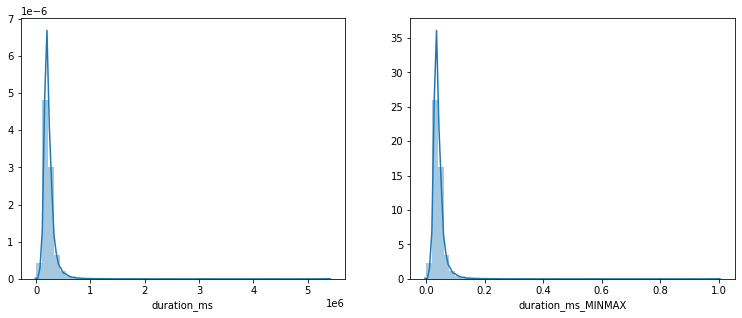

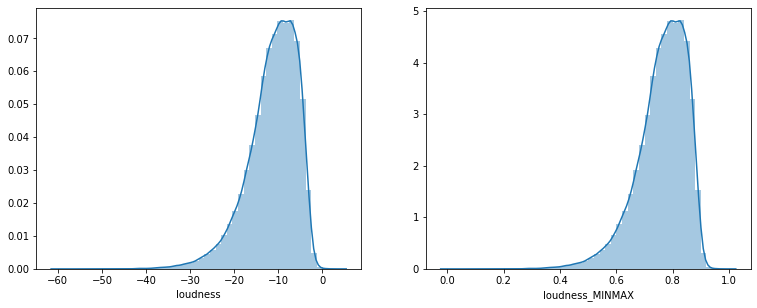

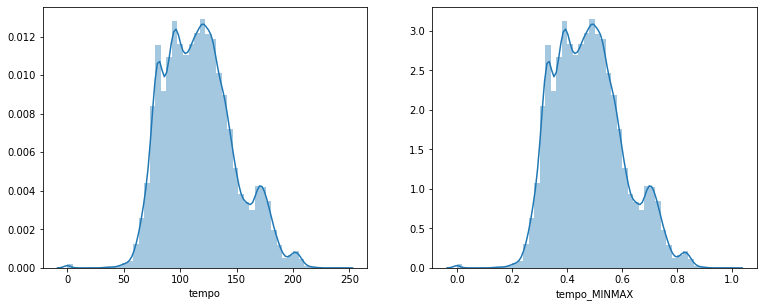

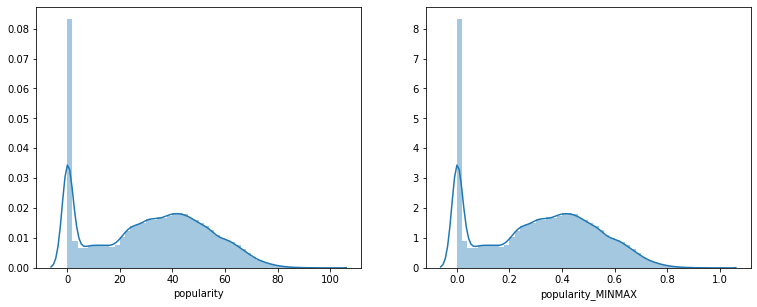

In [15]:
for feature in features_to_scale:
    feature_mm = feature + "_MINMAX"

    fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
    sns.distplot(df1[feature], ax=ax[0])
    sns.distplot(df1[feature_mm], ax=ax[1])
    plt.show()

## 4. Корреляционный анализ данных

In [16]:
df2 = df1.drop(features_to_scale, axis=1)
df2.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,mode,speechiness,valence,duration_ms_MINMAX,loudness_MINMAX,tempo_MINMAX,popularity_MINMAX
0,0.732,0.819,0.341,0,0.000000,7,0.160,1,0.4150,0.9630,0.032496,0.744797,0.249645,0.08
1,0.982,0.279,0.211,0,0.878000,10,0.665,1,0.0366,0.0594,0.153112,0.624916,0.331655,0.05
2,0.996,0.518,0.203,0,0.000000,0,0.115,1,0.0615,0.4060,0.028601,0.773800,0.271296,0.06
3,0.982,0.279,0.211,0,0.878000,10,0.665,1,0.0366,0.0594,0.153112,0.624916,0.331655,0.04
4,0.957,0.418,0.193,0,0.000002,3,0.229,1,0.0380,0.2530,0.029932,0.781521,0.416505,0.04


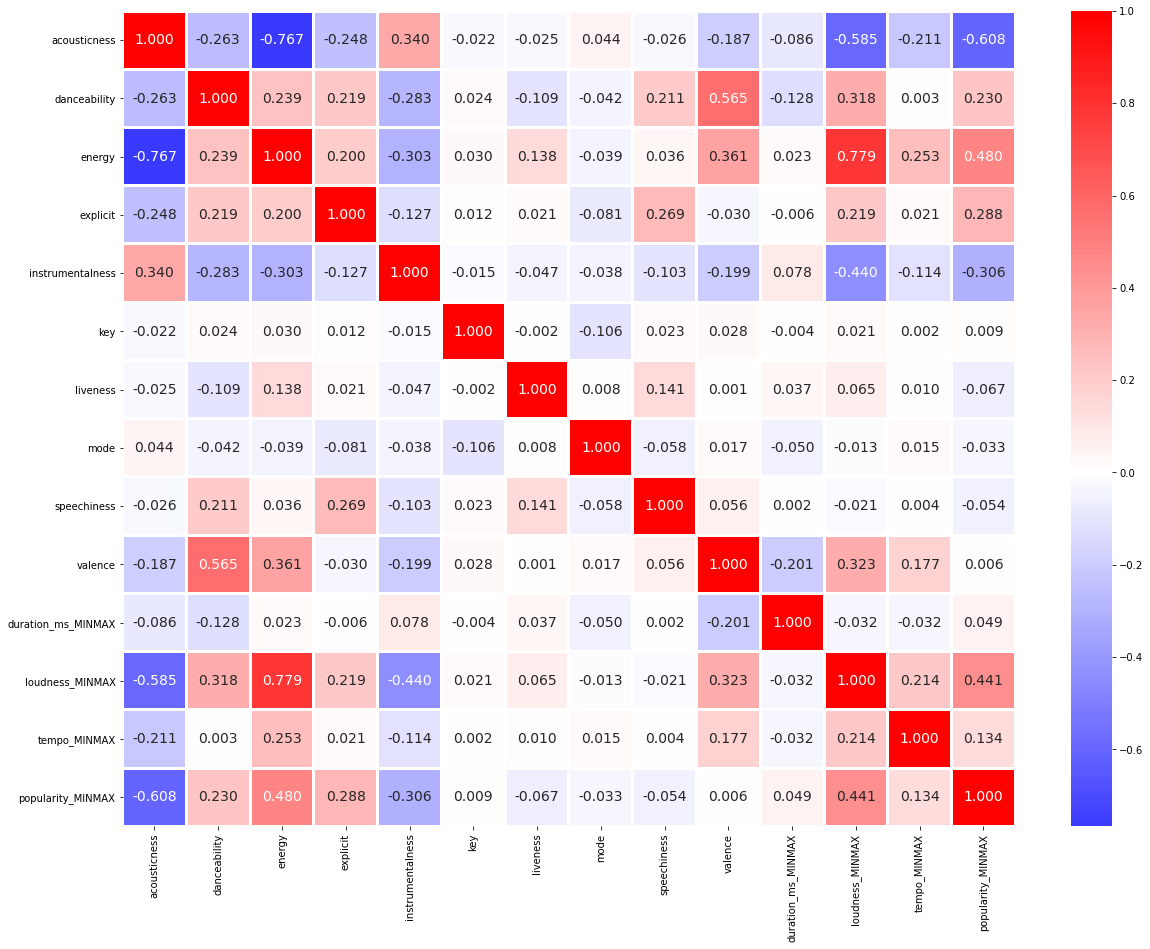

In [17]:
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='bwr', annot=True, fmt='.3f', linewidths=2, annot_kws={'size': 14}, center=0)

Выводы:

*   Наиболее сильно с целевым признаком `popularity_MINMAX` коррелируют признаки `acousticness`, `energy` и `loudness_MINMAX`. Однако, два последних признака обладают очень похожими корреляционными свойствами, и, следовательно, сильно коррелириуют друг с другом. Более того, они так же сильно коррелируют с признаком `acousticness`. Ввиду этого, следует пренебречь одним из них, в данном случае - признаком `energy`.
*   Признак `valence` почти не коррелирует с целевым (он сильнее коррелирует с большинством входных признаков), так что его можно смело исключать из модели.





In [0]:
df3 = df2.drop(["valence", "energy"], axis=1)

## 5. Выбор метрик оценки качества моделей

### Метрика [MAE (Mean Absolute Error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html\#sklearn.metrics.mean_absolute_error)

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$$

Чем ближе к нулю, тем модель лучше себя показывает.

### Метрика [MSE (Mean Squared Error) ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html\#sklearn.metrics.mean_squared_error)

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

### Метрика [Explained Variance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html\#sklearn.metrics.explained_variance_score)

Метрика оценивает пропорцию, с которой модель учитывает истинную дисперсию целевого признака. Считается по формуле:

$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$

Наилучший показатель равен 1.

### Метрика [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html\#sklearn.metrics.r2_score)

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2},$$

где $$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$$ и $$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$$

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## 6. Выбор моделей для решения задачи регрессии



* Линейная регрессия
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг



## 7. Формирование обучающей и тестовой выборок из исходных данных

Для разделения датасета на обучающую и тестовую выборку воспользуемся методом `sklearn.model_selection.train_test_split()`.

In [0]:
X = df3.drop("popularity_MINMAX", axis=1)
Y = df3["popularity_MINMAX"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(126444, 11) (42148, 11) (126444,) (42148,)


## 8. Baseline модели

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [0]:
models = {
    "LinR": LinearRegression(),
    "LinSVR": LinearSVR(),
    'Tree': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(n_estimators=10),
    'GB': GradientBoostingRegressor(n_estimators=10),
}

In [0]:
logger = MetricLogger()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

def train_model(name, model, log):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  ev = explained_variance_score(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  log.add('MAE', name, mae)
  log.add('MSE', name, mse)
  log.add('EV', name, ev)
  log.add('R2', name, r2)

  print("=================================================")
  print(model)
  print()
  print('MAE={}, MSE={}, EV={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(ev, 3), round(r2, 3)))
  print("=================================================")

In [38]:
%%time
for name, model in models.items():
  train_model(name, model, logger)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=0.131, MSE=0.026, EV=0.427, R2=0.427


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

MAE=0.129, MSE=0.029, EV=0.404, R2=0.363
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.144, MSE=0.039, EV=0.15, R2=0.15
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, m

## 9. Подбор гиперпараметра для ансамблевой модели случайного леса с использованием кросс-валидации

In [0]:
estimators_range = np.array(range(10, 31, 10))
parameters = [{"n_estimators": estimators_range}]

In [48]:
%%time
from sklearn.model_selection import GridSearchCV
regr_gs = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)

CPU times: user 6min 8s, sys: 295 ms, total: 6min 8s
Wall time: 6min 9s


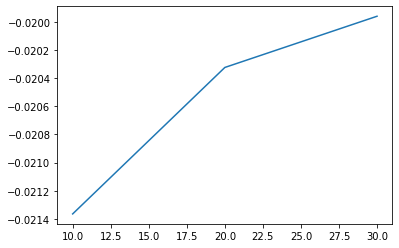

In [50]:
plt.plot(estimators_range, regr_gs.cv_results_['mean_test_score'])

## 10. Случайный лес с подобранным гиперпараметром

In [51]:
train_model("RF_30", regr_gs.best_estimator_, logger)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

MAE=0.107, MSE=0.02, EV=0.567, R2=0.567


## 11.  Визуализация оценок моделей

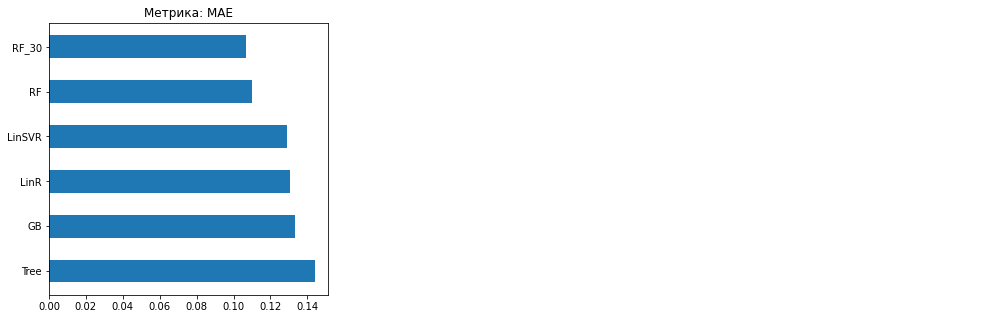

In [69]:
logger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False)

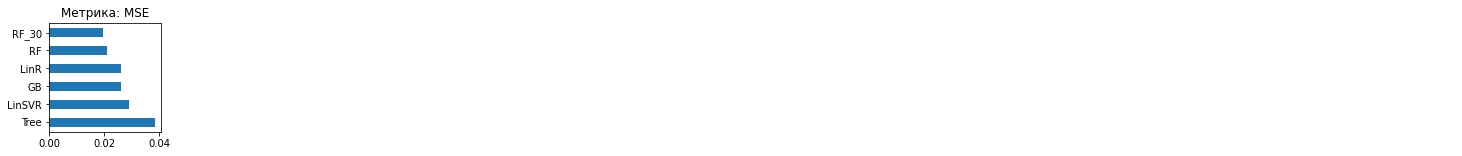

In [74]:
logger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(2, 2))

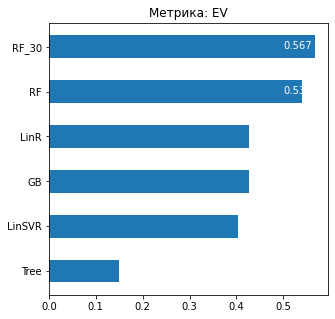

In [75]:
logger.plot('Метрика: ' + 'EV', 'EV', ascending=True)

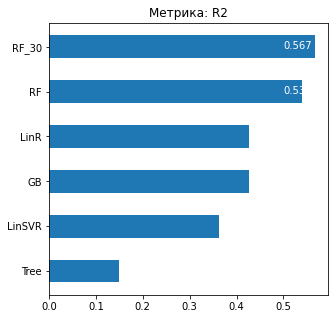

In [76]:
logger.plot('Метрика: ' + 'R2', 'R2', ascending=True)

## 12. Вывод

Наилучшим образом себя показали ансамблевые модели на основе случайного леса. Кросс-валидирующий подбор гиперпараметра `n_estimators` позволил в некоторой степени улучшить работу такой модели.